In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [18]:
# оценки качества воды
QUALITY = ['High', 'Medium', 'Low', 'Terrible']
# столбцы, которые нужно будет преобразовать в числовой формат
NUMERIC_COLUMNS = ['Salinity', 'DissolvedOxygen', 'pH', 'SecchiDepth', 'WaterDepth', 'WaterTemp', 'AirTemp']
# столбцы для удаления
COLUMNS_FOR_DELETE = ['Date']

In [19]:
data = pd.read_csv('waterquality.csv')

In [20]:
# удаляем лишние столбцы
for column in COLUMNS_FOR_DELETE:
    data = data.drop(column, axis=1)

In [21]:
# заполняем пропуски средними значениями
m = data.mean(axis=1)
for i, col in enumerate(data):
    data.iloc[:, i] = data.iloc[:, i].fillna(m)

In [22]:
# приводим данные к числовому представлению
for column in data.columns:
    if column in NUMERIC_COLUMNS:
        data[column] = pd.to_numeric(data[column])

In [23]:
# добавляем индексы в датасет
data.index = [index for index in range(len(data))]

In [24]:
data

,Salinity,DissolvedOxygen,pH,SecchiDepth,WaterDepth,WaterTemp,AirTemp
0,1.584444,1.584444,7.500000,0.300000,0.900000,17.000000,-17.777778
1,9.716667,12.000000,7.500000,0.200000,0.600000,17.500000,20.500000
2,11.440000,11.440000,8.000000,0.400000,0.800000,23.000000,25.000000
3,12.633333,12.000000,8.000000,0.400000,0.900000,25.500000,29.000000
4,13.240000,13.240000,8.500000,0.300000,0.900000,28.500000,28.000000
...,...,...,...,...,...,...,...
2366,0.000000,5.485185,7.000000,0.300000,0.500000,14.000000,11.111111
2367,-17.777778,-17.777778,-17.777778,-17.777778,-17.777778,-17.777778,-17.777778
2368,0.000000,3.900000,6.500000,0.300000,1.800000,22.000000,21.111111
2369,1.000000,7.951852,7.000000,0.600000,1.000000,17.000000,21.111111


In [25]:
# масштабирование данных
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data)

In [26]:
inertia = []

In [27]:
# строим график зависимости инерции от количества кластеров
for i in range(1, 11):
    k_means = KMeans(n_clusters=i, init='k-means++', n_init=10)
    k_means.fit(scaled_data)
    inertia.append(k_means.inertia_)

Text(0, 0.5, 'Внутри-кластерная сумма расстояний')

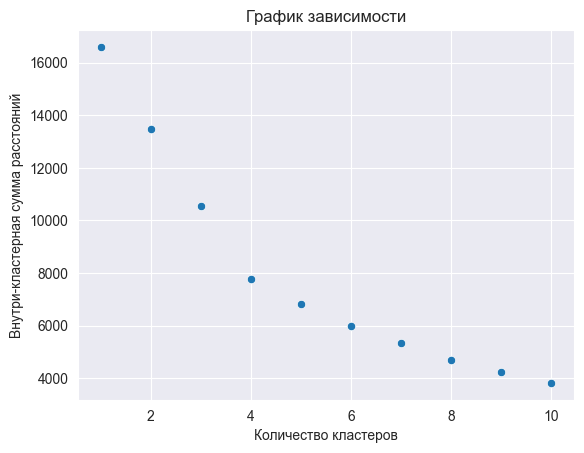

In [28]:
sns.set_style('darkgrid')
sns.scatterplot(
    x=[x for x in range(1, 11)],
    y=inertia,
)

plt.title('График зависимости')
plt.xlabel('Количество кластеров')
plt.ylabel('Внутри-кластерная сумма расстояний')

с помощью метода локтя можно сделать вывод о том, что оптимальное количество кластеров равно 4, так как изгиб проходит именно в этом месте

In [29]:
# создаём модель методом k средних
model = KMeans(n_clusters=4, n_init=10)

In [30]:
# обучаем модель
model.fit(scaled_data)

KMeans(n_clusters=4, n_init=10)

In [31]:
# добавляем метки кластеров
data['Cluster'] = model.labels_

In [32]:
data

,Salinity,DissolvedOxygen,pH,SecchiDepth,WaterDepth,WaterTemp,AirTemp,Cluster
0,1.584444,1.584444,7.500000,0.300000,0.900000,17.000000,-17.777778,1
1,9.716667,12.000000,7.500000,0.200000,0.600000,17.500000,20.500000,0
2,11.440000,11.440000,8.000000,0.400000,0.800000,23.000000,25.000000,0
3,12.633333,12.000000,8.000000,0.400000,0.900000,25.500000,29.000000,0
4,13.240000,13.240000,8.500000,0.300000,0.900000,28.500000,28.000000,0
...,...,...,...,...,...,...,...,...
2366,0.000000,5.485185,7.000000,0.300000,0.500000,14.000000,11.111111,1
2367,-17.777778,-17.777778,-17.777778,-17.777778,-17.777778,-17.777778,-17.777778,3
2368,0.000000,3.900000,6.500000,0.300000,1.800000,22.000000,21.111111,0
2369,1.000000,7.951852,7.000000,0.600000,1.000000,17.000000,21.111111,0


теперь в датасете есть столбец, указывающий, к какому кластеру относится конкретная точка, значит мы всё сделали добре